In [1]:
from pathlib import Path

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from utils import *
from analysis import *

# change plot style
plt.style.use('seaborn')
plt.rcParams['svg.fonttype'] = 'none'
rc('font', family='Times New Roman')

neu_dir = Path("/Volumes/shares/NEU")
analysis_dir = neu_dir / "Users/price/ied_analysis"
figures_dir = neu_dir / "Users/price/figures"

## Fig 4: Compare white matter vs. geodesic vs. combination success

In [7]:
propExplained_dict = {'subj': [],
                      'engelClass': [],
                      'cluster': [],
                      'parcel': [],
                      'propExplained': [],
                      'localizationMethod': [],
                      'accuracy': []
                    }

fpath = analysis_dir / "ied_bad_clusters.csv"
subjs = pd.read_csv(fpath)['subject'].unique()

# iterate through subjects
for subj in subjs:

    # instantiate subject object
    s = Subject(subj)
    
    if s.engel_class in ["no_resection","no_outcome","deceased"]:
        continue
    
    # iterate through clusters
    for cluster in s.valid_clusters:
    
        source_lst = list(s.valid_sources_one[cluster])
    
        # check to make sure > 50% of sequences in cluster were localized
        if len(source_lst) > 0:
            
            source = source_lst[0]
            prop_combo = s.fetch_normalized_parc2prop_df(cluster).iloc[source - 1][0]
            accuracy_combo = get_prediction_accuracy(s.engel_class, 
                                                     s.compute_resected_prop([source])[0]
                                                    )
            
            source_geo = s.fetch_normalized_parc2prop_df(cluster, only_geo=True).idxmax().iloc[0]
            prop_geo = s.fetch_normalized_parc2prop_df(cluster, only_geo=True).max().iloc[0]
            accuracy_geo = get_prediction_accuracy(s.engel_class, 
                                                   s.compute_resected_prop([source_geo])[0]
                                                )
            
            source_wm = s.fetch_normalized_parc2prop_df(cluster, only_wm=True).idxmax().iloc[0]
            prop_wm = s.fetch_normalized_parc2prop_df(cluster, only_wm=True).max().iloc[0]
            accuracy_wm = get_prediction_accuracy(s.engel_class,
                                                  s.compute_resected_prop([source_wm])[0]
                                                )
            
            for parc, prop, method, acc in [(source, prop_combo, 'Combination', accuracy_combo),
                                            (source_geo, prop_geo, 'Geodesic', accuracy_geo),
                                            (source_wm, prop_wm, 'White Matter', accuracy_wm)]:
                
                propExplained_dict['subj'].append(s.subj)
                propExplained_dict['engelClass'].append(s.engel_class)
                propExplained_dict['cluster'].append(cluster)
                propExplained_dict['parcel'].append(parc)
                propExplained_dict['propExplained'].append(prop)
                propExplained_dict['localizationMethod'].append(method)
                propExplained_dict['accuracy'].append(acc)

# convert dict to dataframe
df = pd.DataFrame.from_dict(propExplained_dict)

# sort by engelClass
df.sort_values(by='engelClass', inplace=True)

In [33]:
df.groupby(by=['localizationMethod','accuracy'])['accuracy'].count()

localizationMethod  accuracy
Combination         FN          11
                    FP           8
                    TN          20
                    TP          13
Geodesic            FN          13
                    FP           9
                    TN          19
                    TP          11
White Matter        FN          23
                    TN          28
                    TP           1
Name: accuracy, dtype: int64

In [42]:
df.sort_values(by=['engelClass','subj'], inplace=True)
df[df.localizationMethod == 'White Matter']

,subj,engelClass,cluster,parcel,propExplained,localizationMethod,accuracy,color
128,p122,1a,1,34,0.659760,White Matter,FN,4.0
131,p122,1a,2,280,0.341168,White Matter,FN,4.0
23,p13,1a,3,184,0.450402,White Matter,FN,4.0
29,p13,1a,5,320,0.803419,White Matter,FN,4.0
32,p13,1a,6,480,0.135849,White Matter,TP,1.0
26,p13,1a,4,9,0.826923,White Matter,FN,4.0
38,p14,1a,3,392,0.597656,White Matter,FN,4.0
35,p14,1a,1,319,0.710044,White Matter,FN,4.0
143,p154,1a,4,488,0.536458,White Matter,FN,4.0
146,p154,1a,5,316,0.296703,White Matter,FN,4.0


## Fig 3: Create dictionary for conversion to df

In [79]:
# propExplained_dict = {'subj': [],
#                       'engelClass': [],
#                       'cluster': [],
#                       'parcel': [],
#                       'propExplained': [],
#                       'localizationMethod': []
#                     }

# fpath = analysis_dir / "ied_bad_clusters.csv"
# subjs = pd.read_csv(fpath)['subject'].unique()

# # iterate through subjects
# for subj in subjs:

#     # instantiate subject object
#     s = Subject(subj)
    
#     # iterate through clusters
#     for cluster in s.valid_clusters:
    
#         source_lst = list(s.valid_sources_one[cluster])
    
#         # check to make sure > 50% of sequences in cluster were localized
#         if len(source_lst) > 0:
            
#             source = source_lst[0]
#             prop_combo = s.fetch_normalized_parc2prop_df(cluster).iloc[source - 1][0]
            
#             source_geo = s.fetch_normalized_parc2prop_df(cluster, only_geo=True).idxmax().iloc[0]
#             prop_geo = s.fetch_normalized_parc2prop_df(cluster, only_geo=True).max().iloc[0]
            
#             source_wm = s.fetch_normalized_parc2prop_df(cluster, only_wm=True).idxmax().iloc[0]
#             prop_wm = s.fetch_normalized_parc2prop_df(cluster, only_wm=True).max().iloc[0]
            
#             for parc, prop, method in [(source, prop_combo, 'Combination'),
#                                        (source_geo, prop_geo, 'Geodesic'),
#                                        (source_wm, prop_wm, 'White Matter')]:
                
#                 propExplained_dict['subj'].append(s.subj)
#                 propExplained_dict['engelClass'].append(s.engel_class)
#                 propExplained_dict['cluster'].append(cluster)
#                 propExplained_dict['parcel'].append(parc)
#                 propExplained_dict['propExplained'].append(prop)
#                 propExplained_dict['localizationMethod'].append(method)

# # convert dict to dataframe
# df = pd.DataFrame.from_dict(propExplained_dict)

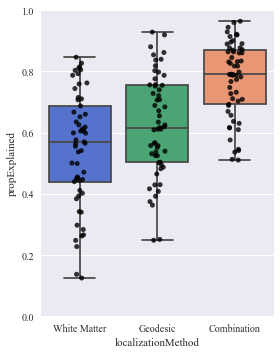

In [94]:
# ### Plot dataframe
# colors = sns.color_palette("Set2")
# g = sns.catplot(data=df, 
#                 x='localizationMethod', 
#                 order=['White Matter', 'Geodesic', 'Combination'],
#                 y='propExplained', 
#                 color='black',
#                 kind='strip', aspect=0.8, alpha=0.8)
# g.map_dataframe(sns.boxplot, 
#                 x='localizationMethod', 
#                 order=['White Matter', 'Geodesic', 'Combination'],
#                 y='propExplained', 
#                 hue='localizationMethod',
#                 palette=(colors[1],'mediumseagreen', 'royalblue'),
#                 dodge=False)

# plt.ylim((0,1));
# plt.savefig((figures_dir / "SourceLocalization_byMethod.svg"), 
#             dpi=300, format='svg')

## Fig 1-2: Create sequences for dictionary for conversion to df

In [2]:
# ### Store information in dictionary

# resected_prop_dict = {'subj': [],
#                       'engelClass': [],
#                       'cluster': [],
#                       'parcel': [],
#                       'propExplained': [],
#                       'type': []
#                     }

# fpath = analysis_dir / "ied_bad_clusters.csv"
# subjs = pd.read_csv(fpath)['subject'].unique()
# for subj in subjs:

#     # instantiate subject object
#     s = Subject(subj)
    
#     if s.engel_class in ["no_resection","no_outcome","deceased"]:
#         continue

#     all_resected_props = np.array(s.compute_resected_prop(range(1,s.parcs+1)))
#     all_resected_parc_idxs = np.squeeze(np.argwhere(all_resected_props >= 0.5), axis=1)

#     for cluster in s.valid_clusters:
        
#         if len(list(s.valid_sources_one[cluster])) > 0:
        
#             best_prop = 0
#             best_parc_idx = all_resected_parc_idxs[0]
#             for parc_idx in all_resected_parc_idxs:
#                 prop = s.fetch_normalized_parc2prop_df(cluster).iloc[parc_idx][0]
#                 if prop > best_prop:
#                     best_prop = prop
#                     best_parc_idx = parc_idx
        
#             resected_prop_dict['subj'].append(s.subj)
#             resected_prop_dict['engelClass'].append(s.engel_class)
#             resected_prop_dict['cluster'].append(cluster)
#             resected_prop_dict['parcel'].append(best_parc_idx + 1)
#             resected_prop_dict['propExplained'].append(best_prop)
#             resected_prop_dict['type'].append("Resection Zone")
            
#             ## ADD BEST PARCEL ##
            
#             source = list(s.valid_sources_one[cluster])
#             #calculate propExplained
#             prop = s.fetch_normalized_parc2prop_df(cluster).iloc[source[0] - 1][0]
            
#             # calculate resected prop
#             resected = s.compute_resected_prop(source)[0]
            
#             resected_prop_dict['subj'].append(s.subj)
#             resected_prop_dict['cluster'].append(cluster)
#             resected_prop_dict['engelClass'].append(f'{s.engel_class}')
#             resected_prop_dict['parcel'].append(source[0])
#             resected_prop_dict['propExplained'].append(prop)
#             resected_prop_dict['type'].append("Localized Source")

## Figure 1: Plot top source (resection zone) by Engel class and whether or not that is the best source for a given cluster

In [57]:
# ### Convert dictionary to dataframe and prepare for plotting

# df = pd.DataFrame.from_dict(resected_prop_dict)

# df['Best Global Source'] = 'No'
# good_outcome = ("1a")

# for subj in df.subj.unique():
#     subj_df = df[df.subj == subj]
    
#     if subj_df.engelClass.iloc[0] in good_outcome:
#         df.loc[df.subj == subj, 'engelClass'] = "Sz Free"
#     else:
#         df.loc[df.subj == subj, 'engelClass'] = "Sz Persist"
    
#     for cluster in subj_df.cluster.unique():
#         cluster_df = subj_df[subj_df.cluster == cluster]
#         resected_prop = cluster_df.loc[cluster_df.type == 'Resection Zone', 'propExplained'].iloc[0]
#         localized_prop = cluster_df.loc[cluster_df.type == 'Localized Source', 'propExplained'].iloc[0]
        
#         if resected_prop >= localized_prop:
#             df.loc[(df.subj == subj) & (df.cluster == cluster), 'Best Global Source'] = 'Yes'
    
#     type_df = subj_df[subj_df.type == 'Resection Zone']
    
#     # drop non-max clusters for all patients
#     max_mask = type_df['propExplained'] == type_df['propExplained'].max()
#     max_idx = type_df.index[max_mask][0]
#     df.drop(type_df.index[type_df.index != max_idx], inplace=True)  

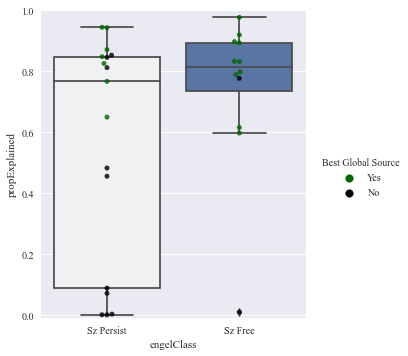

In [78]:
# ### Plot dataframe

# g = sns.catplot(data=df[df.type == 'Resection Zone'], 
#                 x='engelClass', order=['Sz Persist', 'Sz Free'],
#                 y='propExplained', hue='Best Global Source', palette=['darkgreen', 'black'],
#                 kind='swarm', aspect=0.9, alpha=0.8)
# g.map_dataframe(sns.boxplot, x='engelClass', order=['Sz Persist', 'Sz Free'],
#                 y='propExplained', hue='engelClass',
#                 dodge=False)

# plt.ylim((-0.01,1.0));
# plt.savefig((figures_dir / "ResectionZone_byEngelClass_hueGlobalSource.svg"), 
#             dpi=300, format='svg')

### Plot ROC for Sz Free vs. Sz Persist

In [66]:
# # ignore pandas warnings
# pd.options.mode.chained_assignment = None
# from sklearn.metrics import roc_curve, roc_auc_score

# resection_df = df[df.type == 'Resection Zone']
# resection_df['outcome'] = 0 # outcome 0 = sz persist, 1 = sz free

# resection_df.loc[resection_df.engelClass == 'Sz Free', 'outcome'] = 1
# resection_df['outcome']

# # compute fpr, tpr, thresholds, and auc_score
# fpr, tpr, thresholds = roc_curve(resection_df['outcome'], resection_df['propExplained'])
# auc_score = roc_auc_score(resection_df['outcome'], resection_df['propExplained'])
# optimal_threshold = thresholds[np.argmax(tpr - fpr)]
# optimal_fpr, optimal_tpr = fpr[np.argmax(tpr - fpr)], tpr[np.argmax(tpr - fpr)]

Text(0.4682352941176471, 0.9466666666666667, '(0.59 , 0.92)')

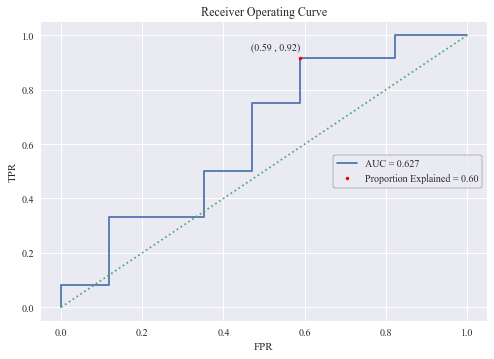

In [70]:
# # Plot receiver operating curve with optimal threshold

# plt.plot(fpr, tpr, label=f"AUC = {auc_score:.3f}")
# plt.plot([0,1],[0,1],':')
# plt.plot(fpr[np.argmax(tpr - fpr)], tpr[np.argmax(tpr - fpr)],'r.', 
#          label=f"Proportion Explained = {optimal_threshold:0.2f}")
# leg = plt.legend(frameon=True, loc="right")
# leg.get_frame().set_edgecolor('black')
# plt.xlabel("FPR")
# plt.ylabel("TPR")
# plt.title("Receiver Operating Curve")
# plt.annotate(xy=(optimal_fpr-0.12, optimal_tpr+0.03), text=f"({optimal_fpr:.2f} , {optimal_tpr:.2f})")
# # plt.savefig(path.join(FIGURES_DIR, "LagTimeROC.png"), bbox_inches="tight", dpi=100)

## Fig 2: Plot top source (whole brain) by concordance and by Engel class

In [10]:
# ### Convert dictionary to dataframe and prepare for plotting

# df = pd.DataFrame.from_dict(resected_prop_dict)

# df['Concordance'] = 'Concordant'
# good_outcome = ("1a")
# discordant_subjs_dict = {"p2": [2],
#                          "p3": [3,4],
#                          "p13": [3,4],
#                          "p57": [3],
#                          "p71": [3],
#                          "p122": [1,2],
#                          "p154": [4],
#                          "p176": [3],
#                          "p31": [1],
#                          "p1": [1],
#                          "p61": [4],
#                          "p65": [3],
#                          "p115": [2,5],
#                          "p34": [2],
#                          "p12": [2]
#                          }

# for subj in df.subj.unique():
#     subj_df = df[df.subj == subj]
    
#     for parc_type in subj_df.type.unique():
        
#         type_df = subj_df[subj_df.type == parc_type]
#         if type_df.engelClass.iloc[0] in good_outcome:
#             df.loc[(df.subj == subj) & (df.type == parc_type), 'engelClass'] = "Sz Free"
#         else:
#             df.loc[(df.subj == subj) & (df.type == parc_type), 'engelClass'] = "Sz Persist"
        
#     if subj in discordant_subjs_dict.keys():
#         for cluster in subj_df.cluster.unique():
#             if cluster in discordant_subjs_dict[subj]:
#                 df.loc[(df.subj == subj) & (df.cluster == cluster), 'Concordance'] = "Discordant"


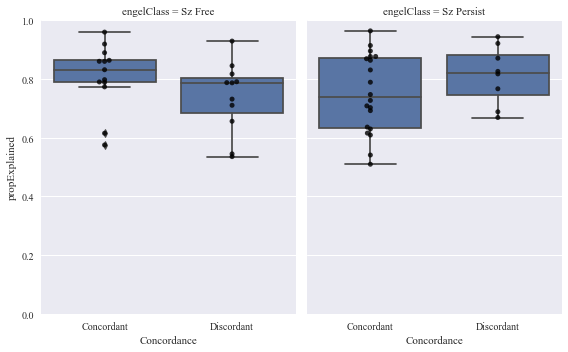

In [28]:
# ### Plot dataframe

# g = sns.catplot(data=df[df.type == 'Localized Source'], 
#                 x='Concordance', order=['Concordant', 'Discordant'],
#                 y='propExplained', col='engelClass', col_order=['Sz Free', 'Sz Persist'],
#                 kind='swarm', aspect=0.8, color='black', alpha=0.8)
# g.map_dataframe(sns.boxplot, x='Concordance', order=['Concordant', 'Discordant'],
#                 y='propExplained')

# plt.ylim((0,1));
# plt.savefig((figures_dir / "SourceLocalization_byConcordance_byEngelClass.svg"), 
#             dpi=300, format='svg')

## For 600 parcels and 17 networks, create all_sources_results and one_source_results files

In [ ]:
# all_sources_dict = {'subj': [],
#                     'engelClass': [],
#                     'cluster': [],
#                     'parcel': [],
#                     'propExplained': [],
#                     'propResected': []
#                     }
# one_source_dict = {'subj': [], 
#                    'engelClass': [],
#                    'cluster': [],
#                    'parcel': [],
#                    'propExplained': [],
#                    'propResected': []
#                    }

# fpath = analysis_dir / "ied_bad_clusters.csv"
# subjs = pd.read_csv(fpath)['subject'].unique()
# for subj in subjs:
    
#     # instantiate subject object
#     subject = Subject(subj)
    
#     if subject.engel_class in ["no_resection","no_outcome","deceased"]:
#         continue
    
#     for cluster, source_set in subject.valid_sources_all.items():
#         for source in source_set:
            
#             # calculate propExplained
#             prop = subject.fetch_normalized_parc2prop_df(cluster).iloc[source - 1][0]
            
#             # calculate resected prop
#             resected = subject.compute_resected_prop([source])[0]
            
#             all_sources_dict['subj'].append(subject.subj)
#             all_sources_dict['engelClass'].append(subject.engel_class)
#             all_sources_dict['cluster'].append(cluster)
#             all_sources_dict['parcel'].append(source)
#             all_sources_dict['propExplained'].append(prop)
#             all_sources_dict['propResected'].append(resected)
        
#         source = list(subject.valid_sources_one[cluster])
        
#         if len(source) > 0:
#             #calculate propExplained
#             prop = subject.fetch_normalized_parc2prop_df(cluster).iloc[source[0] - 1][0]
            
#             # calculate resected prop
#             resected = subject.compute_resected_prop(source)[0]
            
#             one_source_dict['subj'].append(subject.subj)
#             one_source_dict['cluster'].append(cluster)
#             one_source_dict['engelClass'].append(subject.engel_class)
#             one_source_dict['parcel'].append(source[0])
#             one_source_dict['propExplained'].append(prop)
#             one_source_dict['propResected'].append(resected)

# # save out dataframes
# df = pd.DataFrame.from_dict(all_sources_dict)
# df.to_csv((analysis_dir / "Schaefer_600P_17N/all_sources_results.csv"), index=False)

# df = pd.DataFrame.from_dict(one_source_dict)
# df.to_csv((analysis_dir / "Schaefer_600P_17N/one_source_results.csv"), index=False)